# Save DNN Model

Saving a trained Deep Neural Network model is a crucial step in the machine learning workflow. Once Model is trained and are satisfied with its performance, Model needs to be saved to:

* **Use it for inference/prediction:** Apply the trained model to new, unseen data without retraining.
* **Deploy it:** Integrate the model into an application or service.
* **Continue training later:** Load the saved model and resume training from that point.
* **Share it:** Allow others to use your trained model.

# Different ways to save Model

In TensorFlow and Keras, there are several ways to save a model, each with its own advantages. The most common methods allow you to save:

* **The entire model:** This includes the model's architecture (layers and their configurations), the weights of each layer, and the optimizer's state (which is useful for resuming training).
* **Only the model's architecture:** Saves the structure of the network without the learned weights.
* **Only the model's weights:** Saves only the learned parameters, which can be loaded into a compatible model architecture.

**1. Saving the Entire Model (Recommended: Keras Native Format) and Prediction**

The `.keras` format is the default and recommended format in recent Keras versions. It's a single archive file that contains everything needed to recreate the model.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize the pixel values from 0-255 to 0-1
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

In [4]:
# Convert labels to one-hot encoding
num_classes = 10
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train_one_hot.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test_one_hot.shape}")

Training data shape: (60000, 784)
Training labels shape: (60000, 10)
Testing data shape: (10000, 784)
Testing labels shape: (10000, 10)


In [5]:
model_bn = Sequential()
model_bn.add(Flatten(input_shape=(28 * 28,)))

# 1st Layer
model_bn.add(Dense(128))
model_bn.add(BatchNormalization())
model_bn.add(keras.layers.Activation('relu'))

# 2nd Layer
model_bn.add(Dense(64))
model_bn.add(BatchNormalization())
model_bn.add(keras.layers.Activation('relu'))

# Output Layer
model_bn.add(Dense(num_classes, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Compile the model
# We use 'adam' optimizer and 'categorical_crossentropy' loss for multi-class classification.
# 'accuracy' is included as a metric to monitor performance.
model_bn.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [7]:

# Train the model
# The training process will use the BatchNormalization layers to normalize
# the activations within each batch.
epochs = 10
batch_size = 32
print("\nTraining the model with Batch Normalization...")
history_bn = model_bn.fit(x_train, y_train_one_hot,
                          epochs=epochs,
                          batch_size=batch_size,
                          validation_data=(x_test, y_test_one_hot)) # Use test data for validation


Training the model with Batch Normalization...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8798 - loss: 0.4225 - val_accuracy: 0.9609 - val_loss: 0.1202
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9652 - loss: 0.1111 - val_accuracy: 0.9771 - val_loss: 0.0733
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9740 - loss: 0.0833 - val_accuracy: 0.9785 - val_loss: 0.0709
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9782 - loss: 0.0673 - val_accuracy: 0.9770 - val_loss: 0.0769
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9808 - loss: 0.0597 - val_accuracy: 0.9792 - val_loss: 0.0634
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9848 - loss: 0.0464 - val_accuracy: 0.9790 - val_loss: 0.0719
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9857 - loss: 0.0426 - val_accuracy: 0.9793 - val_loss: 0.0636
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━

In [8]:
# Evaluate the model on the test set to get final performance metrics
print("\nEvaluating the model with Batch Normalization on the test set:")
loss_bn, accuracy_bn = model_bn.evaluate(x_test, y_test_one_hot, verbose=0)

print(f"Test Loss (with BN): {loss_bn:.4f}")
print(f"Test Accuracy (with BN): {accuracy_bn:.4f}")


Evaluating the model with Batch Normalization on the test set:
Test Loss (with BN): 0.0652
Test Accuracy (with BN): 0.9811


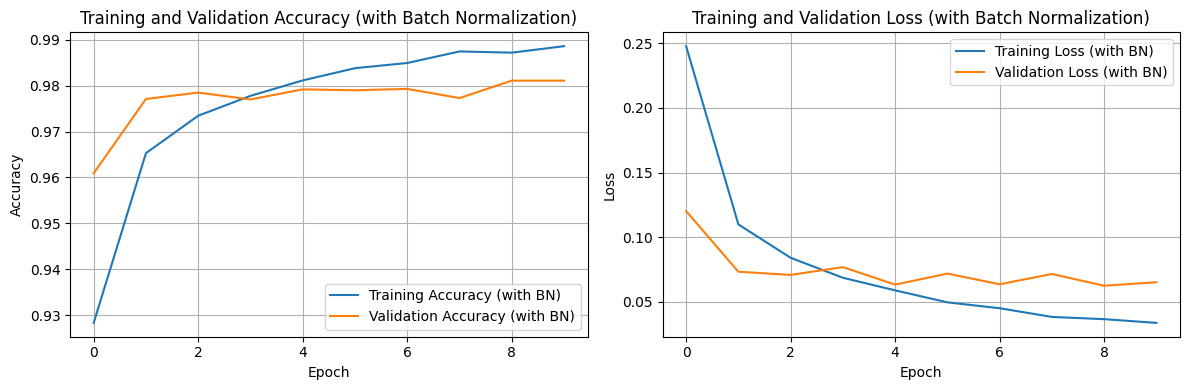

In [9]:
# Plotting training and validation accuracy and loss for the BN model
# This helps visualize the training progress and the effect of BN.
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_bn.history['accuracy'], label='Training Accuracy (with BN)')
plt.plot(history_bn.history['val_accuracy'], label='Validation Accuracy (with BN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (with Batch Normalization)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_bn.history['loss'], label='Training Loss (with BN)')
plt.plot(history_bn.history['val_loss'], label='Validation Loss (with BN)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (with Batch Normalization)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [10]:
# Save the entire model in the native Keras format
model_bn.save('my_model.keras')

print("Entire model saved to 'my_model.keras'")

# To load the model later:
# loaded_model = keras.models.load_model('my_model.keras')
# print("Model loaded successfully!")

Entire model saved to 'my_model.keras'


In [13]:
loaded_model = keras.models.load_model('my_model.keras')
print("Model loaded successfully!")

Model loaded successfully!


### Make Prediction using Saved Model

In [23]:
# Select a few samples to make predictions on
num_prediction_samples = 5
x_new_data = x_test[:num_prediction_samples] # Saceld x_test
y_new_data_true_labels = y_test[:num_prediction_samples] # Keep track of true labels



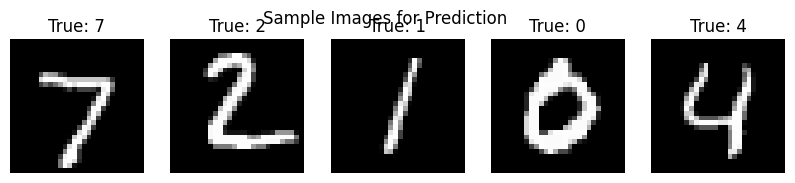

In [36]:
# Display the samples being predicted
plt.figure(figsize=(10, 2))
for i in range(num_prediction_samples):
    plt.subplot(1, num_prediction_samples, i + 1)
    # Reshape the image before displaying
    plt.imshow(x_new_data[i].reshape(28, 28), cmap='gray') # Display the original image
    plt.title(f"True: {y_new_data_true_labels[i]}")
    plt.axis('off')
plt.suptitle("Sample Images for Prediction")
plt.show()

In [33]:
# --- Method 1: Load and predict using the .keras format ---
print("Loading model from 'my_model.keras'...")
try:
    loaded_model_keras = keras.models.load_model('my_model.keras')
    print("Model loaded successfully from .keras format!")

    # Make predictions
    predictions_keras = loaded_model_keras.predict(x_new_data)

    print("\nPredictions using model loaded from .keras format:")
    # The predictions are probability distributions for each class.
    # To get the predicted class, find the index with the highest probability.
    predicted_classes_keras = np.argmax(predictions_keras, axis=1)

    for i in range(num_prediction_samples):
        print(f"Sample {i+1}: Predicted Class = {predicted_classes_keras[i]}, True Label = {y_new_data_true_labels[i]}")

except Exception as e:
    print(f"Could not load model from 'my_model.keras'. Make sure you saved it first. Error: {e}")



Loading model from 'my_model.keras'...
Model loaded successfully from .keras format!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step

Predictions using model loaded from .keras format:
Sample 1: Predicted Class = 7, True Label = 7
Sample 2: Predicted Class = 2, True Label = 2
Sample 3: Predicted Class = 1, True Label = 1
Sample 4: Predicted Class = 0, True Label = 0
Sample 5: Predicted Class = 4, True Label = 4


## **2. Saving the Entire Model (TensorFlow SavedModel format) and Prediction**

The SavedModel format is TensorFlow's standard for saving models and is suitable for deployment with TensorFlow Serving and other platforms.

In [12]:
# Export the entire model in the TensorFlow SavedModel format
model_bn.export('my_model_savedmodel')

print("Entire model saved to 'my_model_savedmodel' directory")


Saved artifact at 'my_model_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 784), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  134870954383248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134870954384400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134870954381520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134870954381136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134870954384208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134870954378256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134870954385168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134870954385360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134870954386512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134870954385936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134870954387088: T

In [31]:
loaded_model = tf.keras.layers.TFSMLayer('my_model_savedmodel', call_endpoint='serving_default')
print("Model loaded successfully!")

Model loaded successfully!


This creates a directory named `my_model_savedmodel` containing the saved model files.

### Make Prediction

In [27]:
# --- Method 2: Load and predict using the SavedModel format ---
print("Loading model from 'my_model_savedmodel'...")
try:
    #loaded_model_savedmodel = tf.keras.layers.TFSMLayer('my_model_savedmodel')
    loaded_model_savedmodel = tf.keras.models.load_model('my_model_savedmodel')
    print("Model loaded successfully from SavedModel format!")

    # Make predictions
    predictions_savedmodel = loaded_model_savedmodel.predict(x_new_data)

    print("\nPredictions using model loaded from SavedModel format:")
    predicted_classes_savedmodel = np.argmax(predictions_savedmodel, axis=1)

    for i in range(num_prediction_samples):
         print(f"Sample {i+1}: Predicted Class = {predicted_classes_savedmodel[i]}, True Label = {y_new_data_true_labels[i]}")

except Exception as e:
    print(f"Could not load model from 'my_model_savedmodel'. Make sure you saved it first. Error: {e}")



Loading model from 'my_model_savedmodel'...
Could not load model from 'my_model_savedmodel'. Make sure you saved it first. Error: File format not supported: filepath=my_model_savedmodel. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(my_model_savedmodel, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).


In [29]:
# --- Method 2: Load and predict using the SavedModel format ---
print("Loading model from 'my_model_savedmodel'...")
try:
    loaded_model_savedmodel = tf.keras.layers.TFSMLayer('my_model_savedmodel')
    print("Model loaded successfully from SavedModel format!")

    # Make predictions
    predictions_savedmodel = loaded_model_savedmodel(x_new_data)

    print("\nPredictions using model loaded from SavedModel format:")
    predicted_classes_savedmodel = np.argmax(predictions_savedmodel, axis=1)

    for i in range(num_prediction_samples):
         print(f"Sample {i+1}: Predicted Class = {predicted_classes_savedmodel[i]}, True Label = {y_new_data_true_labels[i]}")

except Exception as e:
    print(f"Could not load model from 'my_model_savedmodel'. Make sure you saved it first. Error: {e}")



Loading model from 'my_model_savedmodel'...
Model loaded successfully from SavedModel format!

Predictions using model loaded from SavedModel format:
Sample 1: Predicted Class = 7, True Label = 7
Sample 2: Predicted Class = 2, True Label = 2
Sample 3: Predicted Class = 1, True Label = 1
Sample 4: Predicted Class = 0, True Label = 0
Sample 5: Predicted Class = 4, True Label = 4


## **3. Saving Only the Model's Architecture**

You can save the model's architecture as a JSON or YAML file. This is useful if you want to recreate the model structure and load weights separately.

In [19]:

# Save the model architecture as a JSON string
model_json = model_bn.to_json()
with open("my_model_architecture.json", "w") as json_file:
    json_file.write(model_json)

print("Model architecture saved to 'my_model_architecture.json'")

# To load the architecture later:
# with open('my_model_architecture.json', 'r') as json_file:
#     loaded_model_json = json_file.read()
# loaded_model = keras.models.model_from_json(loaded_model_json)
# print("Model architecture loaded successfully!")

Model architecture saved to 'my_model_architecture.json'


In [20]:
with open('my_model_architecture.json', 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model = keras.models.model_from_json(loaded_model_json)
print("Model architecture loaded successfully!")

Model architecture loaded successfully!


## **4. Saving Only the Model's Weights**



You can save only the learned weights of the model. These can then be loaded into a model with the exact same architecture.

In [21]:

# Save only the model's weights
model_bn.save_weights('my_model_weights.weights.h5') # or .tf

print("Model weights saved to 'my_model_weights.weights.h5'")

# To load the weights into a model with the same architecture:
# # First, create the model with the same architecture
# loaded_model_for_weights = Sequential([
#     Flatten(input_shape=(28 * 28,)),
#     Dense(128, activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(10, activation='softmax')
# ])
# # Load the weights
# loaded_model_for_weights.load_weights('my_model_weights.weights.h5')
# print("Model weights loaded successfully!")

Model weights saved to 'my_model_weights.weights.h5'


In [22]:
# To load the weights into a model with the same architecture:
## First, create the model with the same architecture

loaded_model_for_weights = Sequential()
loaded_model_for_weights.add(Flatten(input_shape=(28 * 28,)))

# 1st Layer
loaded_model_for_weights.add(Dense(128))
loaded_model_for_weights.add(BatchNormalization())
loaded_model_for_weights.add(keras.layers.Activation('relu'))

# 2nd Layer
loaded_model_for_weights.add(Dense(64))
loaded_model_for_weights.add(BatchNormalization())
loaded_model_for_weights.add(keras.layers.Activation('relu'))

# Output Layer
loaded_model_for_weights.add(Dense(num_classes, activation='softmax'))

"""loaded_model_for_weights = Sequential([
    Flatten(input_shape=(28 * 28,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])"""
# Load the weights
loaded_model_for_weights.load_weights('my_model_weights.weights.h5')
print("Model weights loaded successfully!")

Model weights loaded successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



When choosing a saving method, saving the entire model (either `.keras` or SavedModel) is generally the most convenient as it captures everything. Saving only the architecture and weights is useful if you need more flexibility or want to store the architecture separately for clarity. The `.keras` format is the most straightforward for standard Keras workflows.